In [1]:
#


# 09/07/2021
# Perform PCA on one dataframe and extract the componente
# Apply the transromation on other sessions
# Fit a cruve to first session PC1 and PC2, and predict next

In [55]:
#%config InlineBackend.figure_format = 'jpeg'
%matplotlib widget


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn.metrics import mean_squared_error
from scipy.interpolate import lagranget

plt.ioff()

%%html
<style>
.output_svg div{
  width: 75% !important;
  height: 75% ;
}
</style>

In [39]:
#Takes a dataframe as input and retuarns the PCA
# Data frame is formatted as 
# freq .625 1.25 2.50 5.00
# 100  ...  ...  ... ...    
# 101  ...  ...  ... ...
# ...  ...  ...  ... ...
def getPCA(df):
    y1 = pd.Series([0, 0.625, 1.25, 2.5, 5, 10])
    #Y = df1.loc[len(df1)-1]; #
    X1_ = df.drop(['freq'], axis = 1)
    X1 = X1_.transpose(); # 

    display(X1)
    
    pca = PCA(n_components = 2)
    X1_reduced = pca.fit_transform(scale(X1))

    df_pca = pd.DataFrame(pca.components_.T)
   
    
    #plt.plot(np.cumsum(pca.explained_variance_ratio_))
    print((pca.explained_variance_ratio_))

    plt.plot(X1_reduced)
    plt.show()
    return (df_pca, X1_reduced)


def applyPCA(df_pca, df_data):
    df_out = pd.DataFrame()
    for i in df2:
        if (i == 'freq'):
            continue
        
        df_out[i] = (df_data[i].dot(df_pca))
    return df_out


    

In [80]:



df1 = pd.read_csv('../june-18/all_mag_csv/small_nh4no3_1_mag.csv', skiprows = 3,index_col=0)
df2 = pd.read_csv('../june-18/all_mag_csv/small_nano3_2_mag.csv', skiprows = 3,index_col=0)
df3 = pd.read_csv('../june-18/all_mag_csv/small_nano2_3_mag.csv', skiprows = 3,index_col=0)
df4 = pd.read_csv('../june-18/all_mag_csv/small_nh4no3_4_mag.csv', skiprows = 3,index_col=0)
df5 = pd.read_csv('../25june/small_nh4no3_1/small_nh4no3_1_mag.csv', skiprows = 3,index_col=0)

#load phase data
dfp1 = pd.read_csv('../june-18/small_nh4no3_1/small_nh4no3_1_phase.csv', skiprows = 3,index_col=0)
dfp2 = pd.read_csv('../june-18/small_nano3_2/small_nano3_2_phase.csv', skiprows = 3,index_col=0)
dfp3 = pd.read_csv('../june-18/small_nano2_3/small_nano2_3_phase.csv', skiprows = 3,index_col=0)

dfp4 = pd.read_csv('../25june/small_nh4no3_ph_6/small_nh4no3_ph_6_phase.csv', skiprows = 3,index_col=0)

dfp1.plot(x='freq')
dfp2.plot(x='freq')
dfp3.plot(x='freq')
dfp4.plot(x='freq')
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0.625,1.526,1.516,1.506,1.498,1.491,1.483,1.477,1.470,1.464,1.459,...,1.385,1.385,1.386,1.386,1.386,1.387,1.387,1.387,1.387,1.388
1.25,1.465,1.454,1.445,1.439,1.432,1.425,1.420,1.415,1.409,1.405,...,1.371,1.372,1.372,1.373,1.373,1.374,1.374,1.375,1.375,1.375
2.5,1.423,1.413,1.405,1.399,1.393,1.387,1.382,1.377,1.372,1.368,...,1.368,1.368,1.369,1.370,1.370,1.371,1.371,1.372,1.372,1.373
5.0,1.355,1.348,1.340,1.335,1.330,1.324,1.320,1.316,1.312,1.308,...,1.367,1.368,1.368,1.369,1.370,1.370,1.371,1.372,1.372,1.373
10.0,1.291,1.287,1.282,1.278,1.274,1.270,1.267,1.265,1.261,1.260,...,1.367,1.368,1.369,1.369,1.370,1.371,1.371,1.372,1.373,1.373


[0.96828646 0.03027613]


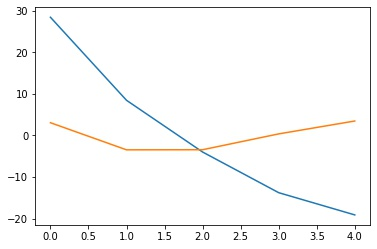

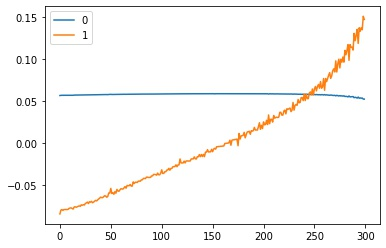

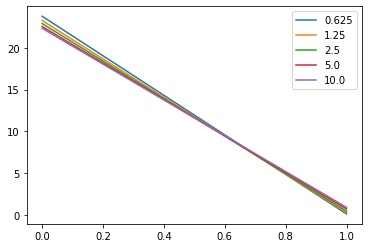

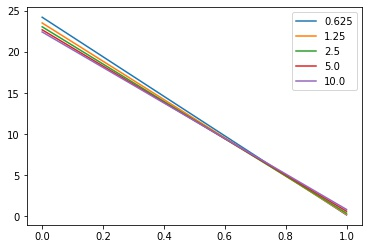

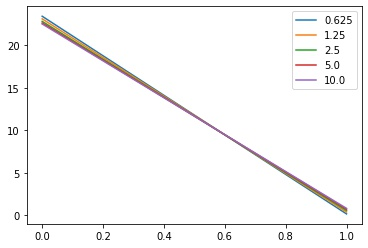

In [50]:

#df5.plot(x='freq')

#df2.plot(x='freq')
#(df2_pca, X2_reduced) = getPCA(df2)
#df2_pca.plot(title='NH4NO3 - PCA', ylim=(-1,1))
#print(X2_reduced)

#Get principal components
df1_pca, x1_r = getPCA(dfp1)

df1_pc = applyPCA(df1_pca, dfp1)
df2_pc = applyPCA(df1_pca, dfp2)
df4_pc = applyPCA(df1_pca, dfp4)

df1_pca.plot()

df1_pc.plot()
df2_pc.plot()
df4_pc.plot()
plt.show()

In [14]:
def expFun(x, K, C, D):
    return np.exp(K*(x+C)) + D

def polyFun(x, A, B, C, D):
    return A*x**3 + B*x**2 + C*x + D;
 

In [71]:

def curveFitExp(y, ref_values, initial): 
   
    #p = np.poly1d(np.polyfit(ref_values, y, 2))
    
    opt_params, param_cov = sp.optimize.curve_fit(expFun, ref_values, y, maxfev=2000, p0 = initial)

  #  opt_params, cov = sp.optimize.leastsq(func=resid, x0 = np.array([-0.0674492,-2236, 2]), args=(ref_values, y))
    
    (K,C, D) =  opt_params
   # print ('Fitted parameters')
    print (opt_params)
    
    t = np.linspace(min(ref_values), max(ref_values))

    predicted = [expFun(x, *opt_params) for x in t]
    
    if 1:
        plt.plot(ref_values, y, marker='|', label = 'Readings')
        plt.plot(t, predicted, label = 'Fitted curve')

        plt.scatter(ref_values, [expFun(x,K,C,D) for x in ref_values], marker ='x')
        plt.title('Fitting exp curve' )
        plt.xlabel('Principal Component')
        plt.ylabel('nitrate ug/L')
        plt.legend()
        plt.show()
    return opt_params



def curveFitPoly(y, ref_values): 
   
    p = np.poly1d(np.polyfit(ref_values, y, 2))
    
    
    #(K,C, D) =  opt_params
   # print ('Fitted parameters')
    print (opt_params)
    
    t = np.linspace(min(ref_values), max(ref_values))

    predicted = [p(x) for x in t]
    
    if 1:
        plt.plot(ref_values, y, marker='|', label = 'Readings')
        plt.plot(t, predicted, label = 'Fitted curve')

        plt.plot(ref_values, [p(x) for x in ref_values], marker ='x')
        plt.title('Fitting exp curve' )
        plt.xlabel('Principal Component')
        plt.ylabel('nitrate ug/L')
        plt.legend()
        plt.show()
    return p

# Curve-fitting on principal componennts

In [78]:
 #Dataframe to perform the prediction on
ref_df = df1_pc #Dataframe to fit the curves to
predict_df = df2_pc #Dataframe to perform the prediction on


scale_unknown = False # Scale the unknown data to match reference if true

y = [ 0.625, 1.25, 2.5, 5, 10]

# Principal component 1

#EIS Readings to fit the curve for
ref_values = np.array(ref_df.iloc[0].tolist()[0:])
# data from a different session to run through the fitted curve
comp_values_unscaled = np.array(predict_df.iloc[0].tolist()[0:])


if scale_unknown: # scale the unknown variable? 
    r = ref_values[3]/comp_values_unscaled[3]
    comp_values = [x*r for x in comp_values_unscaled]
else:
    comp_values = comp_values_unscaled

#opt_params_0 = curveFitExp(y, ref_values,  np.array([-0.0674492,-38700, 0]))

opt_params_0 = curveFitExp(y, ref_values,  np.array([-0.0674492,-22, 0]))
#polynomial_0 = curveFitPoly(y, ref_values)    

print(opt_params_0)


predicted = [expFun(x, *opt_params_0) for x in comp_values]




plt.title('Estimated concentrations using PCA')
plt.scatter(y, predicted)
plt.xlabel('Actual')
plt.ylabel('Estimated')
plt.plot([0,10],[0,10])
plt.show()



[ -3.23288165 -23.01536709   0.74504863]


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

[ -3.23288165 -23.01536709   0.74504863]


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## Curve fitting on magnitude data

In [75]:
ref_df = df1 #Dataframe to fit the curves to
predict_df = df4 #Dataframe to perform the prediction on


fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True)
ref_df.plot(x='freq', ax=ax[0], title='Reference')
predict_df.plot(x='freq', ax=ax[1], title='Unknown')
plt.show()

freq_vs_error = [[],[]]

#Produce a 3d plot with all curves
plot_3d = False

# Scale the unknown readings to one point in the known reading.
# Basically calibrating the instrument against one known concentration
scale_unknown = 1



if (plot_3d):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection = '3d')


# Concentration values in ug/L excluding the 0.625mg/L
y=np.array([x/1000 for x in [ 1250, 2500, 5000, 10000]])

for idx in range(10,11):
    s_freq = ref_df['freq'][idx]

    #print('selected frequency ' + str(s_freq))




    #EIS Readings to fit the curve for
    ref_values = np.array(ref_df.iloc[idx].tolist()[2:])

    # data from a different session to run through the fitted curve
    comp_values_unscaled = np.array(predict_df.iloc[idx].tolist()[2:])

    
    if scale_unknown: #scaling
        r = ref_values[3]/comp_values_unscaled[3]
        comp_values = [x*r for x in comp_values_unscaled]
    else:
        comp_values = comp_values_unscaled
    
    opt_params = curveFitExp(y, ref_values,  np.array([-0.0674492,-2260, 0]))

    K,C,D = opt_params
    
    
 
    
     #Use the curve on comp_values 
    predicted = [expFun(x,K,C,D) for x in comp_values];
    
    
    
    if(plot_3d):
        t = np.linspace(min(ref_values), max(ref_values)+10)
        curve = [expFun(x,K,C,D) for x in t];
        ax.plot(t, curve, zs=s_freq, zdir='y', color='orange');
        ax.plot(comp_values, y, zs=s_freq, zdir='y', color='gray');

    

   
    
    if 0:
        plt.scatter(y, predicted , marker='x')
        plt.plot(y,y);
        plt.xlabel('Actual concentration')
        plt.ylabel('Predicted concentration')
        plt.title('Fitted curve applied to a different session')
        plt.show()

    error = [(predicted[c]-y[c]) for c in range(len(y))]
    freq_vs_error[0].append(s_freq)
    freq_vs_error[1].append(error) #append an array containing error at each concentration
    print(error)
if (plot_3d):
    ax.set_xlabel("Sensor reading")
    ax.set_ylabel("Frequency")
    ax.set_zlabel("Concentration")
    plt.show()


    
    
plt.scatter(y, predicted)
plt.plot([0,10],[0,10])
plt.show()
    
#plot a error-vs-freq at each concentration
for i in range(len(y)):
    plt.plot(freq_vs_error[0], [x[i] for x in freq_vs_error[1]], label = str(y[i]), linewidth=1);
    
#plot square root error
plt.plot(freq_vs_error[0], [np.linalg.norm(e) for e in freq_vs_error[1]], label= 'Norm')
plt.title('Error when using a single frequency to calculate unknown concentration')
plt.xlabel('Frequency')
plt.ylabel('Error')
plt.legend()
plt.grid()
#plt.ylim((-5, 5))
plt.show()




Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

[-1.20680454e+00 -2.20959687e+03  1.87114954e+00]


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

[0.6211495428467659, -0.6243447831161706, 0.10273811163256497, -0.002027541729717086]


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …